# Рынок заведений общественного питания Москвы


## Описание проекта
Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?


Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

### Описание данных

Таблица `rest_df`:
* 		`id` — идентификатор объекта;
* 		`object_name` — название объекта общественного питания;
* 		`chain` — сетевой ресторан;
* 		`object_type` — тип объекта общественного питания;
* 		`address` — адрес;
* 		`number` — количество посадочных мест.

---

## Общая информация

In [1]:
# подключим необходимые библиотеки и настройки отображения

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from io import BytesIO
import requests

custom_params = {'axes.spines.right': False, 'axes.spines.top': False}
sns.set_theme(style='ticks', rc=custom_params)

%config InlineBackend.figure_format = 'retina'
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.float_format', '{:.2f}'.format)


In [2]:
# прочитаем датасеты и сохраним в переменные

# датасет с адресами Москвы
spreadsheet_id = '1OlmYPO6lmrpQRsWuh09WfXMEIW4rz-GEcsi-NUxM5kg'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df_moscow = pd.read_csv(BytesIO(r.content))

# датасет с данными для проекта
df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_data.csv')

In [3]:
# посмотрим информацию о датасете с адресами Москвы

df_moscow.info()
df_moscow.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10238 entries, 0 to 10237
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   adm_area  10238 non-null  object
 1   district  10238 non-null  object
 2   address   10238 non-null  object
dtypes: object(3)
memory usage: 240.1+ KB


,adm_area,district,address
0,Северо-Восточный административный округ,Ярославский район,"город Москва, улица Егора Абакумова, дом 9"
1,Центральный административный округ,Таганский район,"город Москва, улица Талалихина, дом 2/1, корпус 1"
2,Центральный административный округ,Таганский район,"город Москва, Абельмановская улица, дом 6"
3,Северо-Восточный административный округ,район Лианозово,"город Москва, Угличская улица, дом 17"
4,Центральный административный округ,район Арбат,"город Москва, переулок Сивцев Вражек, дом 6/2"


In [4]:
# посмотрим информацию о датасете с данными проекта

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [5]:
# поиск пропущенных значений в столбцах

df.isna().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

In [6]:
# поиск явных дубликатов

df.duplicated().sum()

0

**Вывод по шагу:**

Мы загрузили предварительно обработанную базу адресов Москвы и датасет с данными для проекта.

Датасет в порядке: 15366 строк, типы данных корректные, отсутствуют пропущенные значения и явные дубликаты.

Можно приступать к предобработке данных.

---

## Предобработка данных

Для работы с данными необходимо привести их в удобный для расчетов вид: убрать неявные дубли, добавить новые столбцы.

#### Столбец `number`

In [7]:
# переименуем в более понятное название столбец

df = df.rename(columns=({'number':'seats'}))
df

,id,object_name,chain,object_type,address,seats
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


#### Столбец `object_name` в `df`

In [8]:
# просмотрим варианты названий заведений

df['object_name'].sort_values().unique()

array(['1-ЫЙ МОСКОВСКИЙ КАДЕТСКИЙ КОРПУС', '1-й МОК',
       '100 личная столовая', ..., 'школа 775', 'школа 913', 'школа 919'],
      dtype=object)

In [9]:
print('Количество уникальных наименований до обработки:', df['object_name'].nunique())

Количество уникальных наименований до обработки: 10393


In [10]:
# устраним дубли в названиях объектов

df['object_name'] = df['object_name'].str.lower()

df['object_name'] = df['object_name'].str.replace('"', '')
df['object_name'] = df['object_name'].str.replace('«', '')
df['object_name'] = df['object_name'].str.replace('»', '')
df['object_name'] = df['object_name'].str.replace('ё', 'е')

print('Количество уникальных наименований после обработки:', df['object_name'].nunique())

Количество уникальных наименований после обработки: 9835


#### Столбец `object_type` в `df`

In [11]:
# сократим названия неокторых типов объектов для удобства отображения на графиках
df.replace({'предприятие быстрого обслуживания':'фастфуд', \
            'магазин (отдел кулинарии)':'кулинария'}, inplace=True)
df['object_type'].unique()


array(['кафе', 'столовая', 'закусочная', 'фастфуд', 'ресторан',
       'кафетерий', 'буфет', 'бар', 'кулинария'], dtype=object)

#### Столбец `address` в `df`

In [12]:
# приведем к нижнему регистру адреса

df['address'] = df['address'].str.lower()

#### Столбцы `chain` и `chain_bin` в `df`

In [13]:
# заменим названия категорий для лучшей читабельности

df['chain'] = df['chain'].replace({'нет':'несетевой', 'да': 'сетевой'})


# добавим столбец для удобного расчета долей категории

df['chain_bin'] = df['chain'].replace({'несетевой': 0, 'сетевой': 1})

#### Обработка `df_moscow`

In [14]:
# приведем к нижнему регистру все данные

columns = ['address', 'district', 'adm_area']
for i in columns:
  df_moscow[i] = df_moscow[i].str.lower()

df_moscow

,adm_area,district,address
0,северо-восточный административный округ,ярославский район,"город москва, улица егора абакумова, дом 9"
1,центральный административный округ,таганский район,"город москва, улица талалихина, дом 2/1, корпус 1"
2,центральный административный округ,таганский район,"город москва, абельмановская улица, дом 6"
3,северо-восточный административный округ,район лианозово,"город москва, угличская улица, дом 17"
4,центральный административный округ,район арбат,"город москва, переулок сивцев вражек, дом 6/2"
...,...,...,...
10233,центральный административный округ,пресненский район,"российская федерация, город москва, внутригоро..."
10234,центральный административный округ,басманный район,"российская федерация, город москва, внутригоро..."
10235,центральный административный округ,тверской район,"город москва, театральная площадь, дом 5, стро..."
10236,северо-западный административный округ,район северное тушино,"город москва, улица героев панфиловцев, дом 1,..."


---

## Анализ данных

### 1. Исследуйте соотношение видов объектов общественного питания по количеству. 

Постройте график.


In [15]:
# сгруппируем объекты по типам

object_types = df.groupby('object_type') \
    .agg({'id':'count'}) \
    .rename(columns=({'id':'total'})) \
    .sort_values(by='total', ascending=False) \
    .reset_index()
    
object_types

,object_type,total
0,кафе,6099
1,столовая,2587
2,ресторан,2285
3,фастфуд,1923
4,бар,856
5,буфет,585
6,кафетерий,398
7,закусочная,360
8,кулинария,273


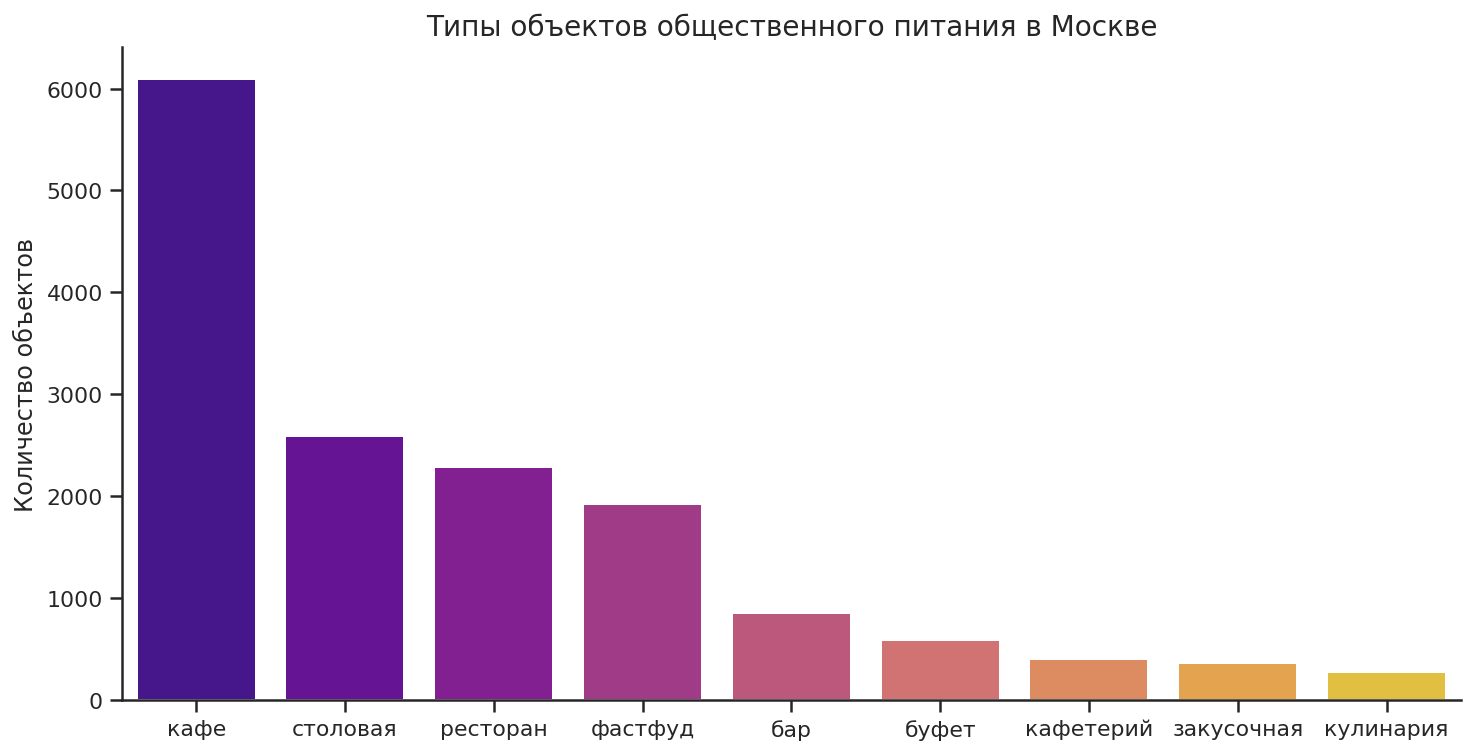

In [16]:
# построим график 

plt.figure(figsize=(12,6))
ax = sns.barplot(x='object_type', y='total', data=object_types,
                 palette='plasma')
ax.set(xlabel='', ylabel='Количество объектов')
plt.title('Типы объектов общественного питания в Москве', fontsize=14)
plt.show();

**Вывод:** самое частый тип заведения общественного питания в Москве – **кафе**. Похоже, что конкуренция будет сильная.

В пятерке лидеров – по убыванию количества точек: столовая, ресторан, фастфуд (предприятие быстрого питания) и бар.

Меньше всего в городе кулинарий.

---

### 2. Исследуйте соотношение сетевых и несетевых заведений по количеству. 

Постройте график.


In [17]:
# сгруппируем по количеству сетевых и несетевых заведений

chains = df.groupby('chain', as_index=False) \
    .agg({'id':'count'}) \
    .rename(columns=({'chain':'chain_type', 'id':'total'}))
    
# добавим столбец с соотношением долей

chains['share'] = chains['total'] / chains['total'].sum()
chains

,chain_type,total,share
0,несетевой,12398,0.81
1,сетевой,2968,0.19


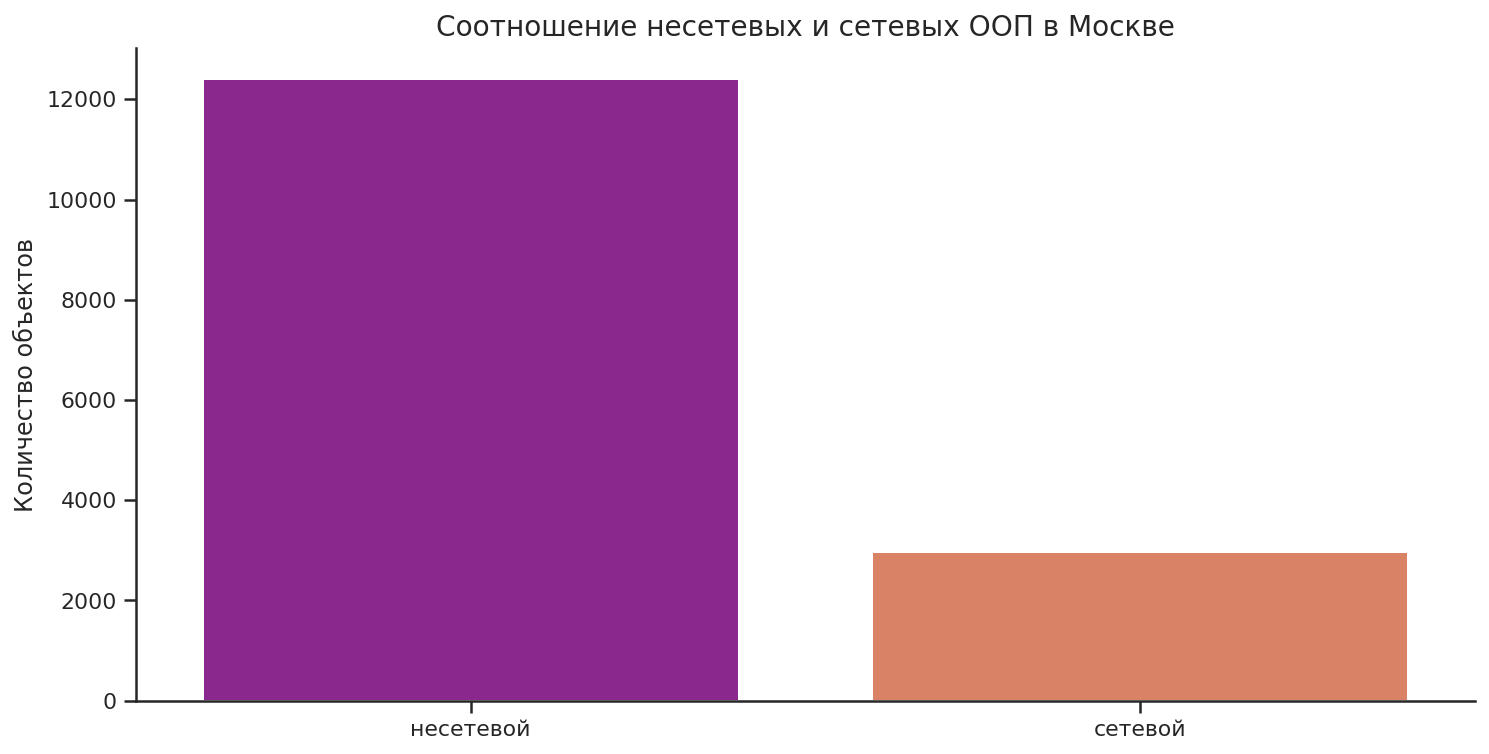

In [18]:
# построим график

plt.figure(figsize=(12,6))
ax = sns.barplot(x='chain_type', y='total', data=chains, palette='plasma')

ax.set(xlabel='', ylabel='Количество объектов')
plt.title('Соотношение несетевых и сетевых ООП в Москве', fontsize=14)
plt.show()

**Вывод:** Подавляющее большинство заведений общественного питания в Москве – **не являются сетевыми**, их доля составляет 81% от общего числа исследуемых объектов.

Сетевых заведений всего 19%.

---

###  3. Для какого вида объекта общественного питания характерно сетевое распространение?



In [19]:
# сгруппируем по типам и соотношению долей сетевых заведений

object_type_chain_shares = df.groupby('object_type') \
                .agg({'chain_bin':'mean'}) \
                .rename(columns=({'chain_bin':'chain_share'})) \
                .sort_values(by='chain_share', ascending=False) \
                .reset_index()
                
object_type_chain_shares

,object_type,chain_share
0,фастфуд,0.41
1,кулинария,0.29
2,ресторан,0.24
3,кафе,0.23
4,закусочная,0.16
5,кафетерий,0.13
6,бар,0.04
7,буфет,0.02
8,столовая,0.00


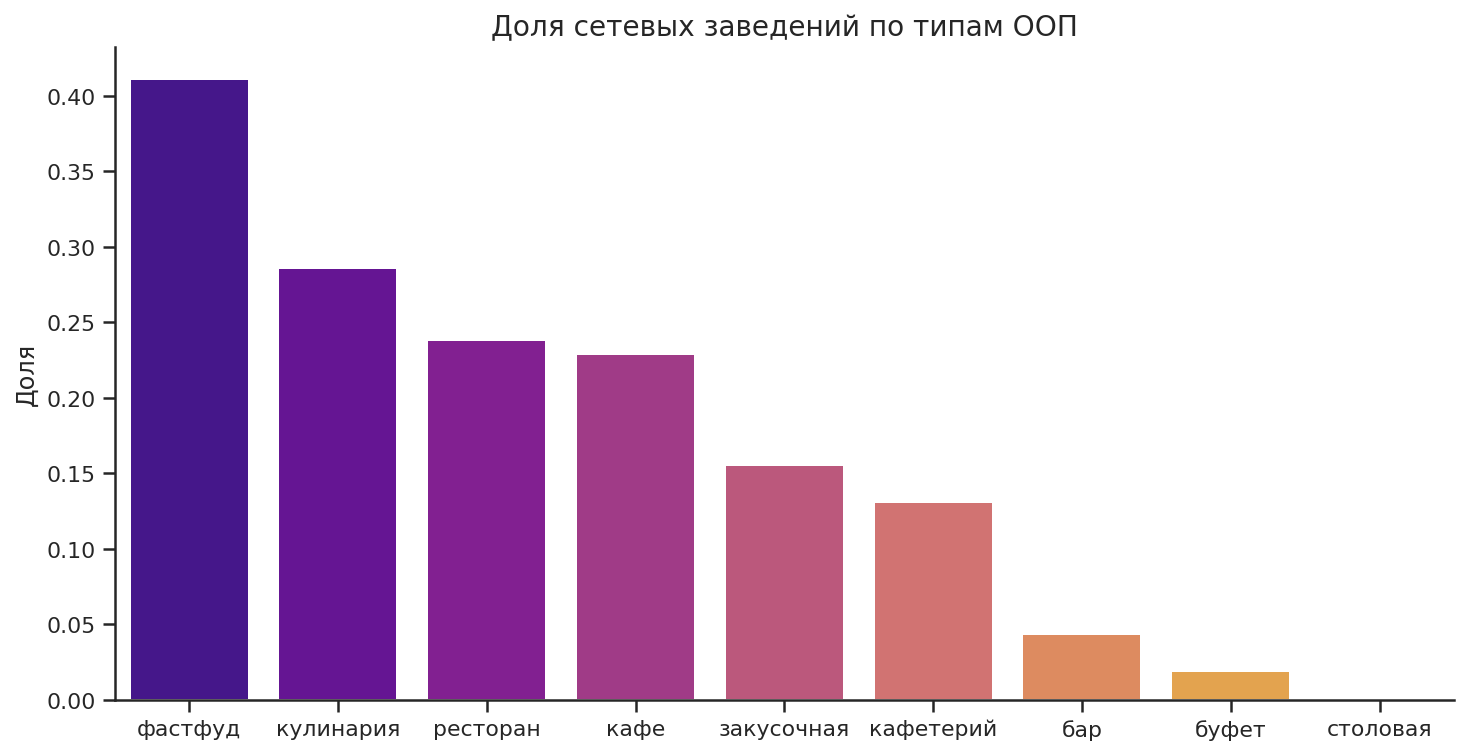

In [20]:
# построим график

plt.figure(figsize=(12,6))
ax = sns.barplot(x='object_type', y='chain_share',
                 data=object_type_chain_shares, palette='plasma')
ax.set(xlabel='', ylabel='Доля')
plt.title('Доля сетевых заведений по типам ООП', fontsize=14)
plt.show()

**Вывод:** Самая большая доля сетевых заведений Москвы (41%) приходится на заведения типа **фастфуд (предприятия быстрого питания)**. 

Чуть менее сильно сетевой тип выражен у кулинарий (29%), ресторанов (24%) и кафе (23%).

Практически отсутствуют в городе сетевые столовые.

---

###  Что характерно для сетевых заведений: 

много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?



In [21]:
# выделим даные по сетевым заведениям в отдельный набор данных

chains_df = df.query('chain == "сетевой"')

# выведем статистики по столбцу посадочных мест
chains_df['seats'].describe()

count   2968.00
mean      52.92
std       57.14
min        0.00
25%       15.00
50%       40.00
75%       72.00
max      580.00
Name: seats, dtype: float64

Медианное количество посадочных мест, характерное для сетевых заведений – **40**. Среднее количество – 52.9. 

Будем отталкиваться от цифры в 50 посадочных мест.
Примем, что заведения с местами меньше 50 – это заведения с малым количеством, а больше или равные 50 – с большим количеством посадочных мест.

Для упрощения анализа добавим в датафрейм 2 категории:

In [22]:
# зададим функцию для определения категории заведения по количеству посадочных мест

def seats_cat(df):
    seats = df['seats']
    if seats < 50:
      return 'мало посадочных мест'
    return 'много посадочных мест'

# применим функцию к новому столбцу

chains_df['seats_category'] = chains_df.apply(seats_cat, axis=1)

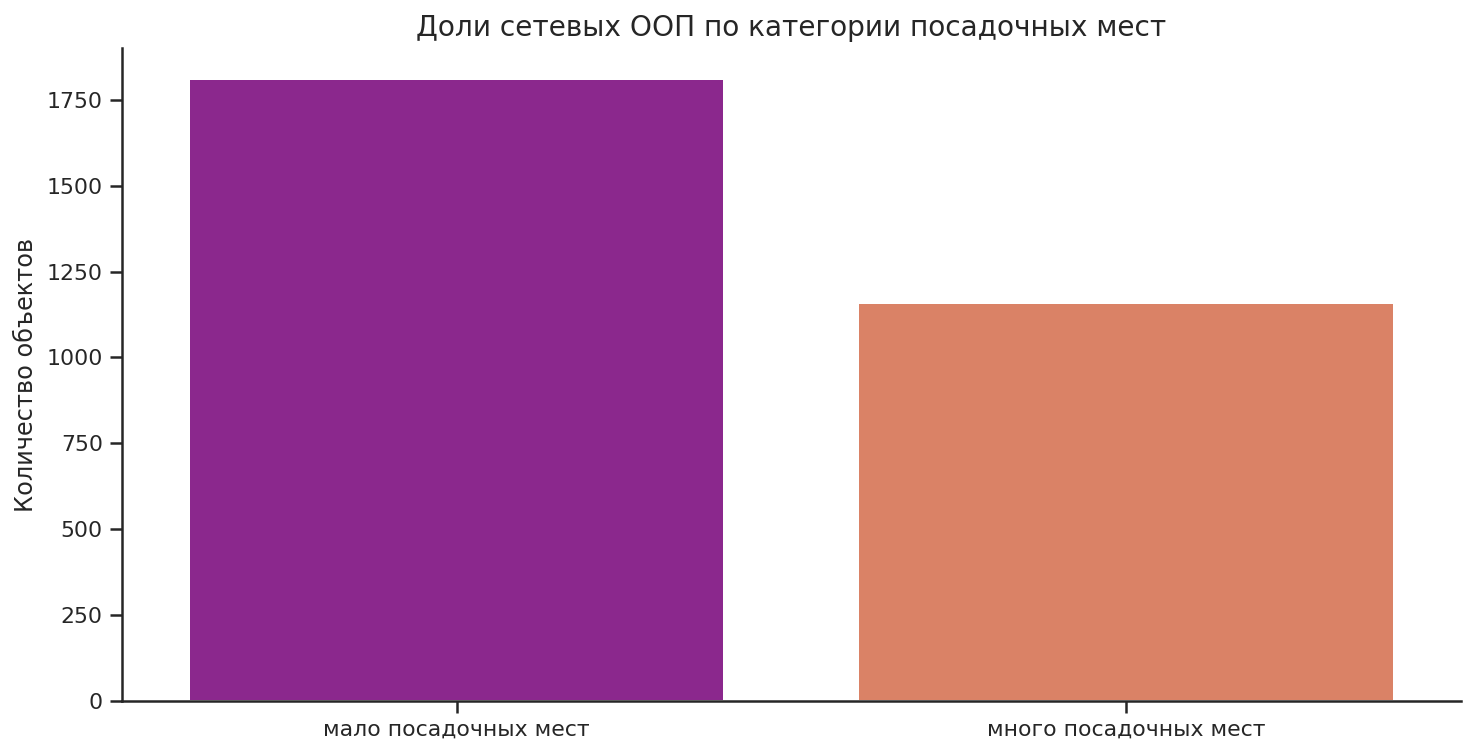

In [23]:
# построим график общего распределения по категории мест

plt.figure(figsize=(12,6))
ax = sns.countplot(data=chains_df, x='seats_category', palette='plasma')

ax.set(xlabel='', ylabel='Количество объектов')
plt.title('Доли сетевых ООП по категории посадочных мест', fontsize=14)
plt.show()

И отдельно посмотрим как распределяются типы сетевых ООП по категориям.

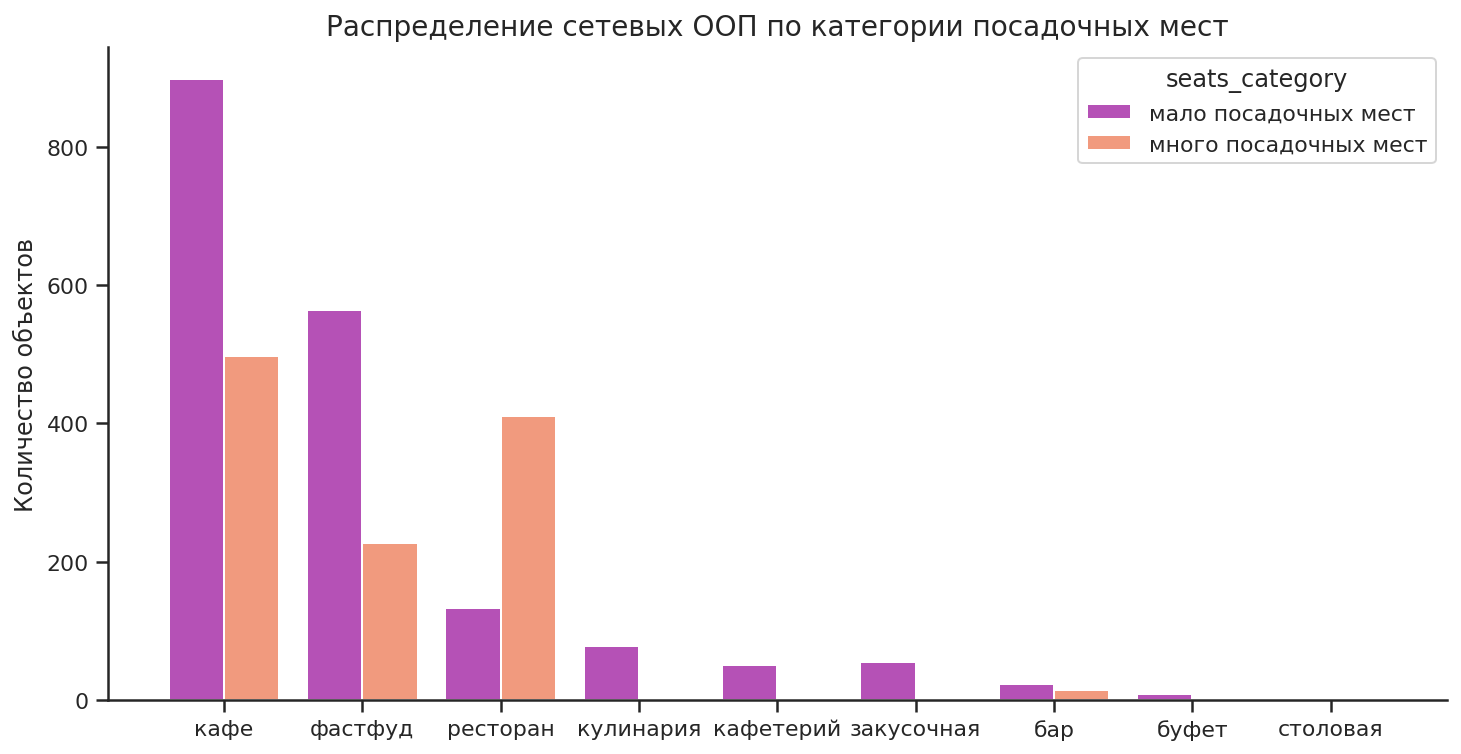

In [24]:
# построим график распределения типов ООП по категориям посадочных мест

plt.figure(figsize=(12,6))
ax = sns.histplot(data=chains_df, x='object_type', hue='seats_category',\
                  multiple='dodge', palette='plasma', shrink=.8)

ax.set(xlabel='', ylabel='Количество объектов')
plt.title('Распределение сетевых ООП по категории посадочных мест', fontsize=14)
plt.show()

**Вывод:** 
В основном **для сетевых заведений более характерно большое количество точек с небольшим количеством посадочных мест**.

Большая часть кафе и фастфудов имеют менее 50 посадочных мест. Отличаются рестораны – здесь традиционно посадочных мест больше, чем по медиане.

Около 9% заведений не имеют посадочных мест вообще (например, точки «на вынос», кулинарии).

---

In [25]:
# создадим выборку по сетевым заведениям

chain_research = df.query('chain == "сетевой"') \
                        .groupby('object_name') \
                        .agg({'seats':'median', 'chain_bin':'sum'}) \
                        .rename(columns=({'seats':'seats_median', \
                                          'chain_bin':'chain_total'})) \
                        .sort_values(by='chain_total', ascending=False) \
                        .query('chain_total > 1') \
                        .reset_index()
chain_research

,object_name,seats_median,chain_total
0,шоколадница,50.00,157
1,kfc,45.00,155
2,макдоналдс,76.00,151
3,бургер кинг,45.00,137
4,теремок,23.00,94
...,...,...,...
243,барашка,93.00,2
244,барбекю,22.50,2
245,бенто wok,18.00,2
246,венеция,97.50,2


In [26]:
chains_df

,id,object_name,chain,object_type,address,seats,chain_bin,seats_category
3,21894,пиццетория,сетевой,кафе,"город москва, абрамцевская улица, дом 1",40,1,мало посадочных мест
6,148815,брусника,сетевой,кафе,"город москва, переулок сивцев вражек, дом 6/2",10,1,мало посадочных мест
13,22579,алло пицца,сетевой,кафе,"город москва, улица авиаторов, дом 14",32,1,мало посадочных мест
16,144107,суши wok,сетевой,фастфуд,"город москва, азовская улица, дом 3",7,1,мало посадочных мест
18,58565,тануки,сетевой,ресторан,"город москва, большая академическая улица, дом 65",160,1,много посадочных мест
...,...,...,...,...,...,...,...,...
15361,208537,шоколадница,сетевой,кафе,"город москва, 3-й крутицкий переулок, дом 18",50,1,много посадочных мест
15362,209264,шоколадница,сетевой,кафе,"город москва, улица земляной вал, дом 33",10,1,мало посадочных мест
15363,209186,шоколадница,сетевой,кафе,"город москва, улица земляной вал, дом 33",20,1,мало посадочных мест
15364,221900,шоколадница,сетевой,кафе,"город москва, поселение московский, киевское ш...",36,1,мало посадочных мест


In [27]:
# зададим функцию для определения категории по количеству мест и заведений в сети

# в качестве ориентира берем медиану мест сетевых заведений

def chain_research_cat(df):
    seats = df['seats_median']
    chain = df['chain_total']
    seats_med = chains_df['seats'].median()
    chain_med = chain_research['chain_total'].median()
    if seats <= seats_med and chain <= chain_med:
      return 'мало мест, мало заведений'
    if seats <= seats_med and chain > chain_med:
      return 'мало мест, много заведений'
    if seats > seats_med and chain <= chain_med:
      return 'много мест, мало заведений'
    return 'много мест, много заведений'

# применим функцию к новому столбцу

chain_research['category'] = chain_research.apply(chain_research_cat, axis=1)

In [28]:
chain_research

,object_name,seats_median,chain_total,category
0,шоколадница,50.00,157,"много мест, много заведений"
1,kfc,45.00,155,"много мест, много заведений"
2,макдоналдс,76.00,151,"много мест, много заведений"
3,бургер кинг,45.00,137,"много мест, много заведений"
4,теремок,23.00,94,"мало мест, много заведений"
...,...,...,...,...
243,барашка,93.00,2,"много мест, мало заведений"
244,барбекю,22.50,2,"мало мест, мало заведений"
245,бенто wok,18.00,2,"мало мест, мало заведений"
246,венеция,97.50,2,"много мест, мало заведений"


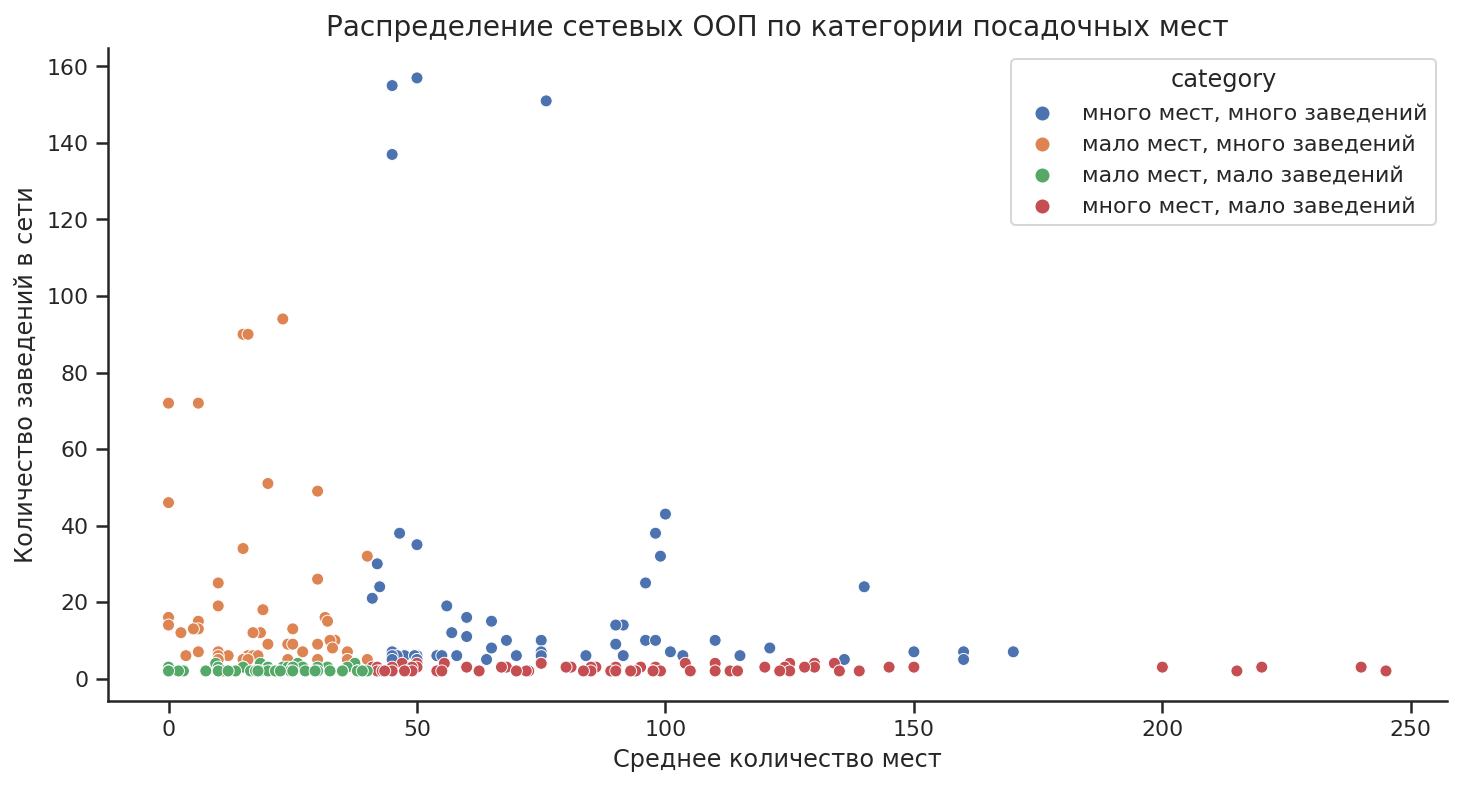

In [29]:
# построим график распределения сетей по категориям посадочных мест

plt.figure(figsize=(12,6))
ax = sns.scatterplot(data=chain_research, x='seats_median', \
                     y='chain_total', hue='category')

ax.set(xlabel='Среднее количество мест', ylabel='Количество заведений в сети')
plt.title('Распределение сетевых ООП по категории посадочных мест', fontsize=14)
plt.show()

**Вывод:** большое количество сетевых заведений, где мало мест и небольшая сеть. Много заведений, где сеть большая и мест много.

###  Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. 

Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.



In [30]:
# создадим выборку с числом посадочных мест по типам заведений 

seats_medians = df.groupby('object_type') \
                        .agg({'seats':'median'}) \
                        .rename(columns=({'seats':'seats_median'})) \
                        .sort_values(by='seats_median', ascending=False) \
                        .reset_index()
seats_medians

,object_type,seats_median
0,столовая,103.00
1,ресторан,80.00
2,бар,35.00
3,буфет,32.00
4,кафе,30.00
5,кафетерий,6.00
6,фастфуд,5.00
7,закусочная,0.00
8,кулинария,0.00


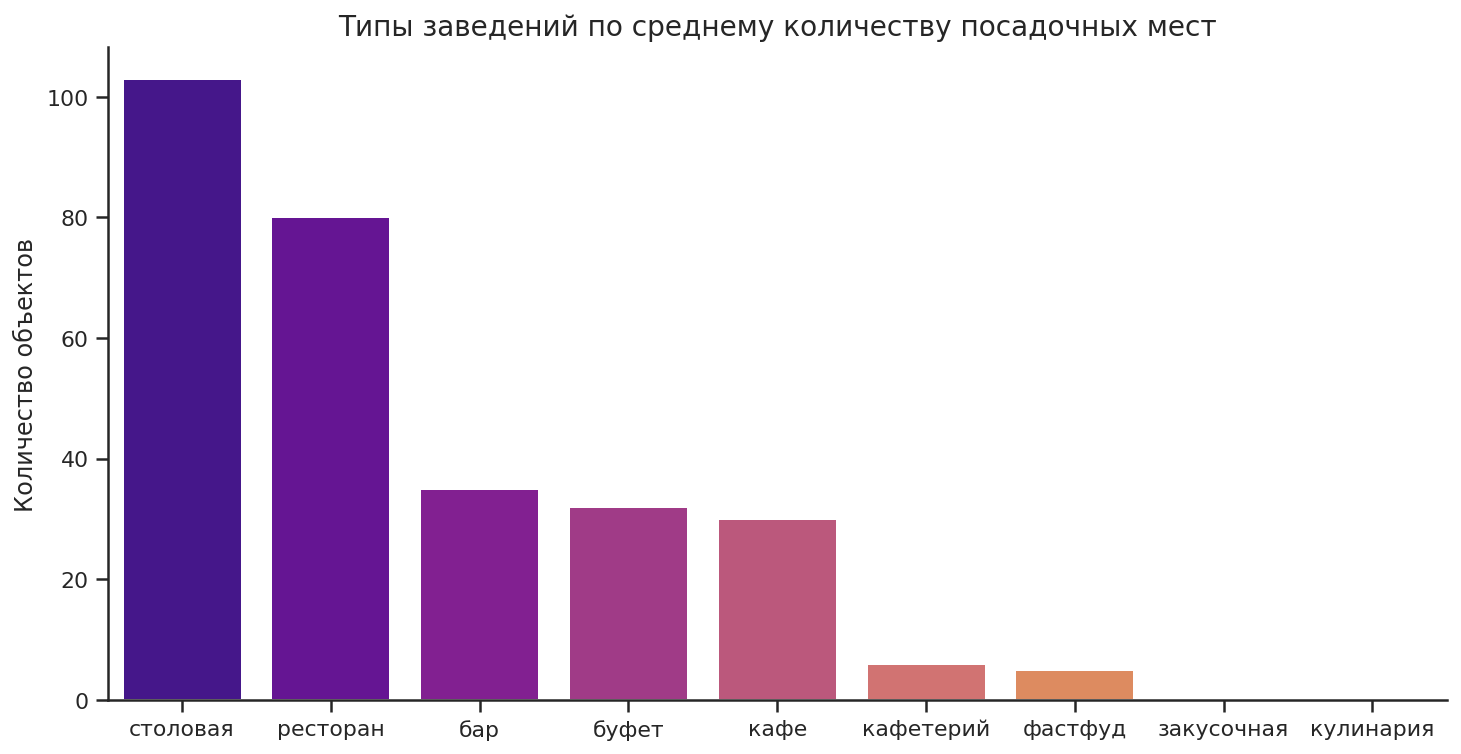

In [31]:
# построим график

plt.figure(figsize=(12,6))
ax = sns.barplot(data=seats_medians, x='object_type', y='seats_median',
                 palette='plasma')

ax.set(xlabel='', ylabel='Количество объектов')
plt.title('Типы заведений по среднему количеству посадочных мест', fontsize=14)
plt.show()

**Вывод:** 
Самое большое среднее по посадочным местам у заведений с типом «столовая». Этот тип обычно рассчитан на большой поток посетителей в обеденное время, поэтому там требуется большее количество мест, чем в заведениях, более распределенных по времени активности посетителей.

В ресторанах в среднем тоже количество мест выше, чем по медиане – этот тип заведения рассчитан на большие компании и зачастую имеет несколько залов.

Снова видим любопытные данные по заведениям с нулевым количеством посадочных мест, то они уже не удивляют – теперь мы уже знаем, что в таких типах заведений не предусмотрено сидячих мест и это не ошибка.

---

###  Выделите в отдельный столбец информацию об улице из столбца `address`


In [32]:
# добавим столбец с названиями улиц

df['street'] = df['address'].str.split(', ').str[1]
df

,id,object_name,chain,object_type,address,seats,chain_bin,street
0,151635,сметана,несетевой,кафе,"город москва, улица егора абакумова, дом 9",48,0,улица егора абакумова
1,77874,родник,несетевой,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,0,улица талалихина
2,24309,кафе академия,несетевой,кафе,"город москва, абельмановская улица, дом 6",95,0,абельмановская улица
3,21894,пиццетория,сетевой,кафе,"город москва, абрамцевская улица, дом 1",40,1,абрамцевская улица
4,119365,кафе вишневая метель,несетевой,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,0,абрамцевская улица
...,...,...,...,...,...,...,...,...
15361,208537,шоколадница,сетевой,кафе,"город москва, 3-й крутицкий переулок, дом 18",50,1,3-й крутицкий переулок
15362,209264,шоколадница,сетевой,кафе,"город москва, улица земляной вал, дом 33",10,1,улица земляной вал
15363,209186,шоколадница,сетевой,кафе,"город москва, улица земляной вал, дом 33",20,1,улица земляной вал
15364,221900,шоколадница,сетевой,кафе,"город москва, поселение московский, киевское ш...",36,1,поселение московский


Помимо улиц в столбец также попали данные по поселениям, деревням, поселкам. Отфильтруем их.

In [33]:
# отфильтруем датафрейм, оставив только адреса улиц

df_streets = df[df['street'].str.contains('город|поселение|деревня|поселок')==False]

### Постройте график топ-10 улиц по количеству объектов общественного питания. 

Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?


In [34]:
# создадим выборку топ-10 с числом объектов по улицам

top_10 = df_streets.groupby('street') \
                        .agg({'id':'count'}) \
                        .rename(columns=({'id':'total_objects'})) \
                        .sort_values(by='total_objects', ascending=False) \
                        .reset_index() \
                        .head(10)
top_10

,street,total_objects
0,проспект мира,204
1,профсоюзная улица,182
2,ленинградский проспект,171
3,пресненская набережная,167
4,варшавское шоссе,161
5,ленинский проспект,147
6,проспект вернадского,132
7,кутузовский проспект,114
8,каширское шоссе,112
9,кировоградская улица,110


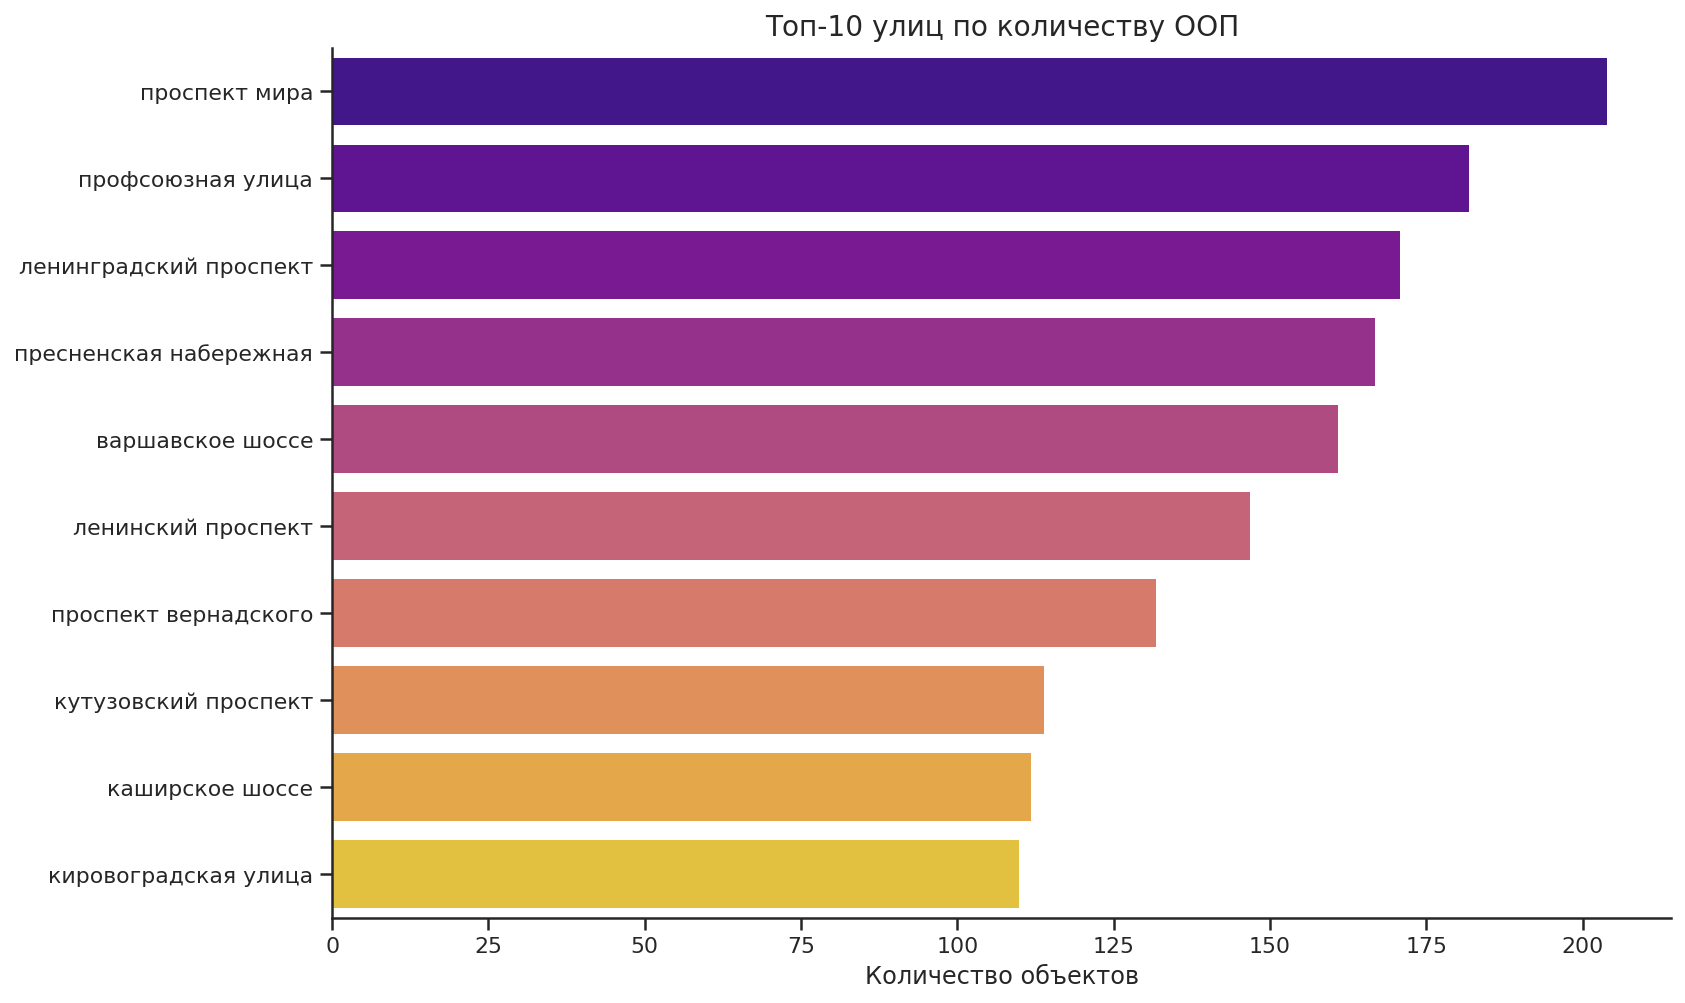

In [35]:
# построим график

plt.figure(figsize=(12,8))
ax = sns.barplot(data=top_10, x='total_objects', y='street',
                 palette='plasma')

ax.set(xlabel='Количество объектов', ylabel='')
plt.title('Топ-10 улиц по количеству ООП', fontsize=14)
plt.show()

**Вывод:** 

Проспект Мира лидирует по количеству заведений общественного питания – там находится 204 объекта. 

Ответим на вопрос "В каких районах Москвы находятся эти улицы?".

In [36]:
# объединим базу общепита с базой адресов Москвы

df_merged = pd.merge(df, df_moscow, on='address', how='inner')

# проверим, не потерялись ли данные

df_merged[df_merged['district'].isna()]['street'].nunique() 

0

In [37]:
# добавим фильтр по топ-10 улиц и объединим по району

top_list = top_10['street'].unique()
top_district = df_merged.query('street in @top_list')\
                        .groupby('district') \
                        .agg({'id':'count'}) \
                        .rename(columns=({'id':'total_objects'})) \
                        .sort_values(by='total_objects', ascending=False) \
                        .reset_index() \
                        .head(10)

top_district

,district,total_objects
0,пресненский район,167
1,район чертаново центральное,87
2,район тропарёво-никулино,74
3,район фили-давыдково,63
4,район свиблово,62
5,район аэропорт,62
6,обручевский район,60
7,мещанский район,53
8,район беговой,46
9,алексеевский район,44


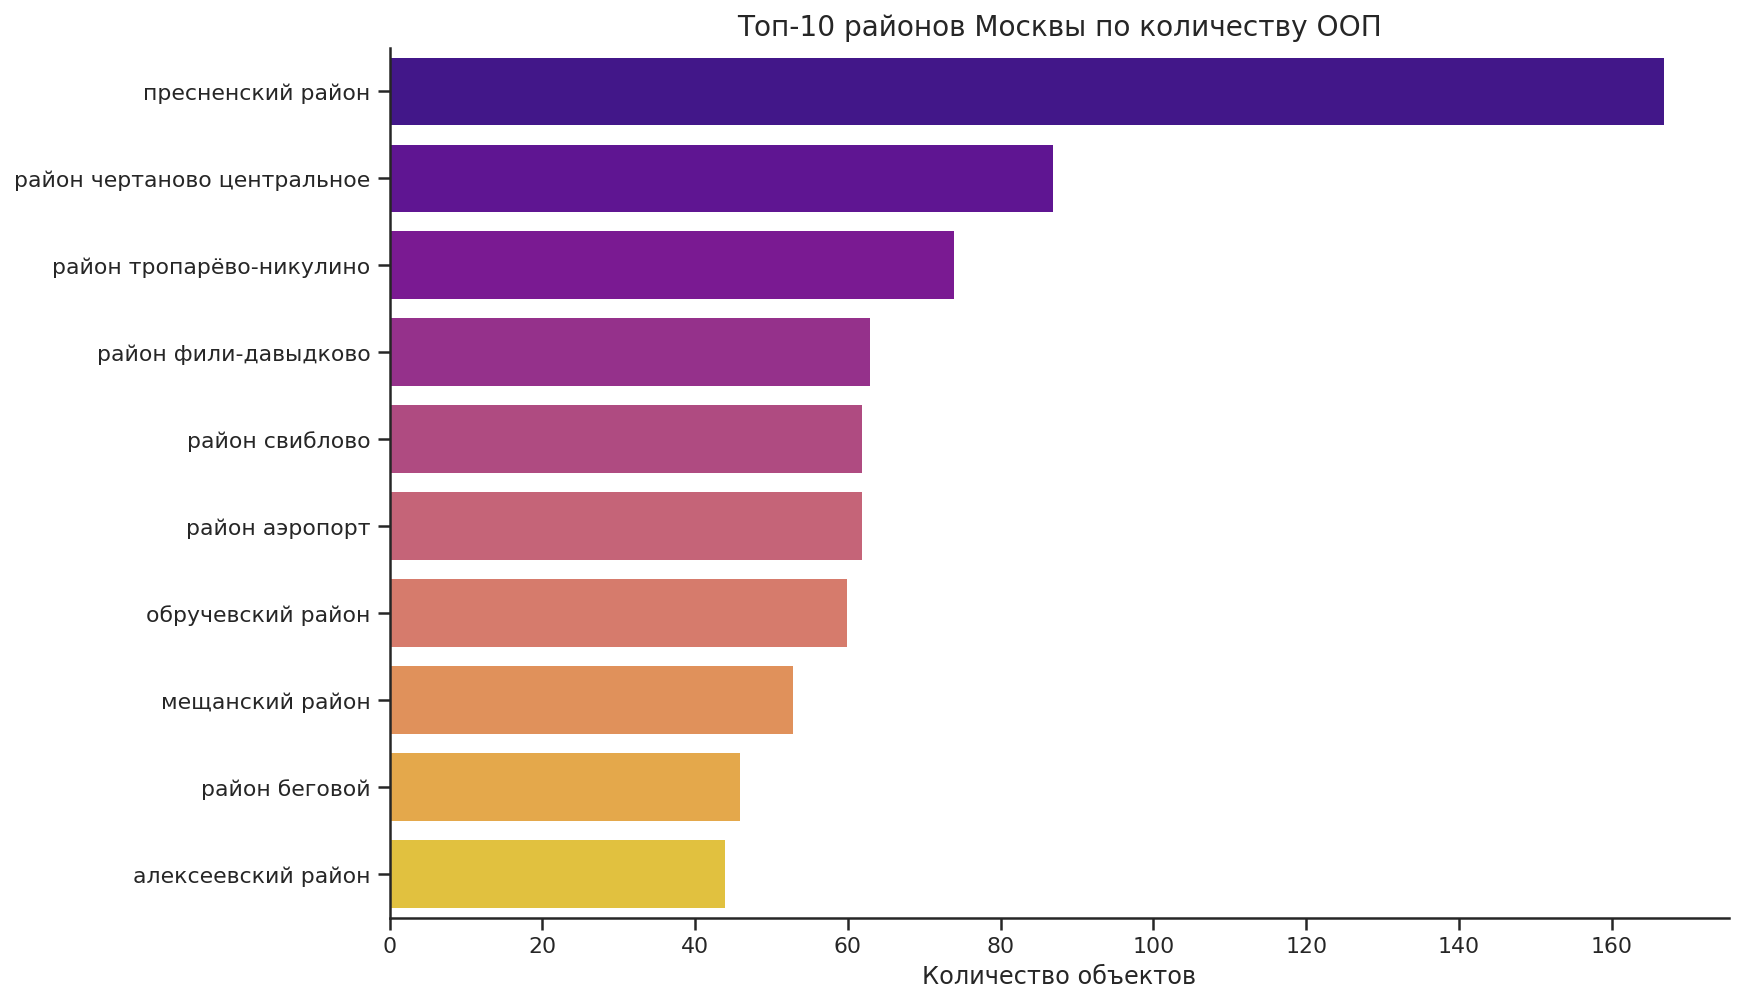

In [38]:
# построим график

plt.figure(figsize=(12,8))
ax = sns.barplot(data=top_district, x='total_objects', y='district',
                 palette='plasma')

ax.set(xlabel='Количество объектов', ylabel='')
plt.title('Топ-10 районов Москвы по количеству ООП', fontsize=14)
plt.show()

**Вывод:** больше всего точек общественного питания в Москве сосредоточено в Пресненском районе – 167 объектов.

### Найдите число улиц с одним объектом общественного питания. 

Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?


In [39]:
# найдем улицы с одним объектом общественного питания

outsiders_streets = df_merged.groupby('street') \
                        .agg({'id':'count'}) \
                        .rename(columns=({'id':'total_objects'})) \
                        .sort_values(by='total_objects', ascending=False) \
                        .query('total_objects == 1') \
                        .reset_index()
                        
outsiders_streets

,street,total_objects
0,улица красных зорь,1
1,улица генерала дорохова,1
2,улица кошкина,1
3,чермянская улица,1
4,чермянский проезд,1
...,...,...
504,окская улица,1
505,октябрьский переулок,1
506,олонецкая улица,1
507,олонецкий проезд,1


Найдено 509 улиц, на которых только 1 заведение общественного питания.

In [40]:
# добавим фильтр и объединим по району

outsiders_list = outsiders_streets['street'].unique()

top_outsiders = df_merged.query('street in @outsiders_list')\
                        .groupby(['district']) \
                        .agg({'street':'count'}) \
                        .rename(columns=({'street':'total_streets'})) \
                        .sort_values(by='total_streets', ascending=False) \
                        .reset_index() \
                        .head(10)

top_outsiders

,district,total_streets
0,таганский район,29
1,пресненский район,24
2,басманный район,24
3,район хамовники,24
4,район сокольники,17
5,тверской район,17
6,мещанский район,11
7,район аэропорт,10
8,можайский район,10
9,район южное бутово,9


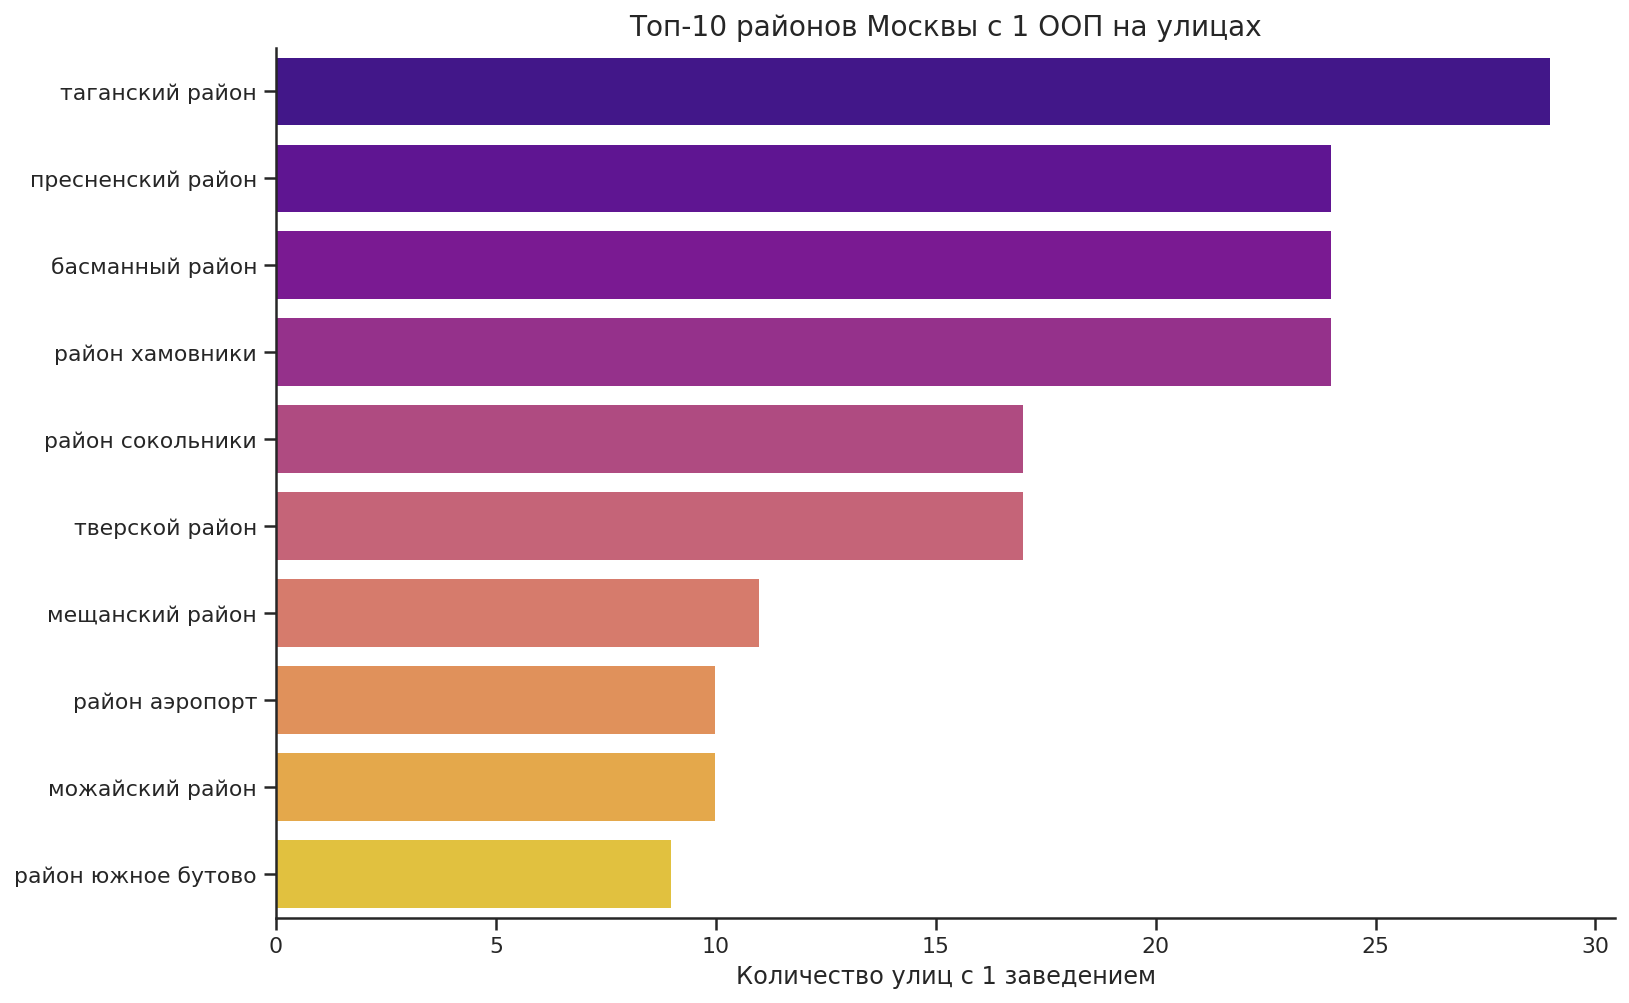

In [41]:
# построим график

plt.figure(figsize=(12,8))
ax = sns.barplot(data=top_outsiders, x='total_streets', y='district',
                 palette='plasma')

ax.set(xlabel='Количество улиц с 1 заведением', ylabel='')
plt.title('Топ-10 районов Москвы с 1 ООП на улицах', fontsize=14)
plt.show()

**Вывод**: В Таганском районе Москвы найдено целых 29 улиц с всего 1 заведением на каждой.

Немного отстают Пресненский, Басманный район и Хамовники – у них по 24 улицы.

### Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. 


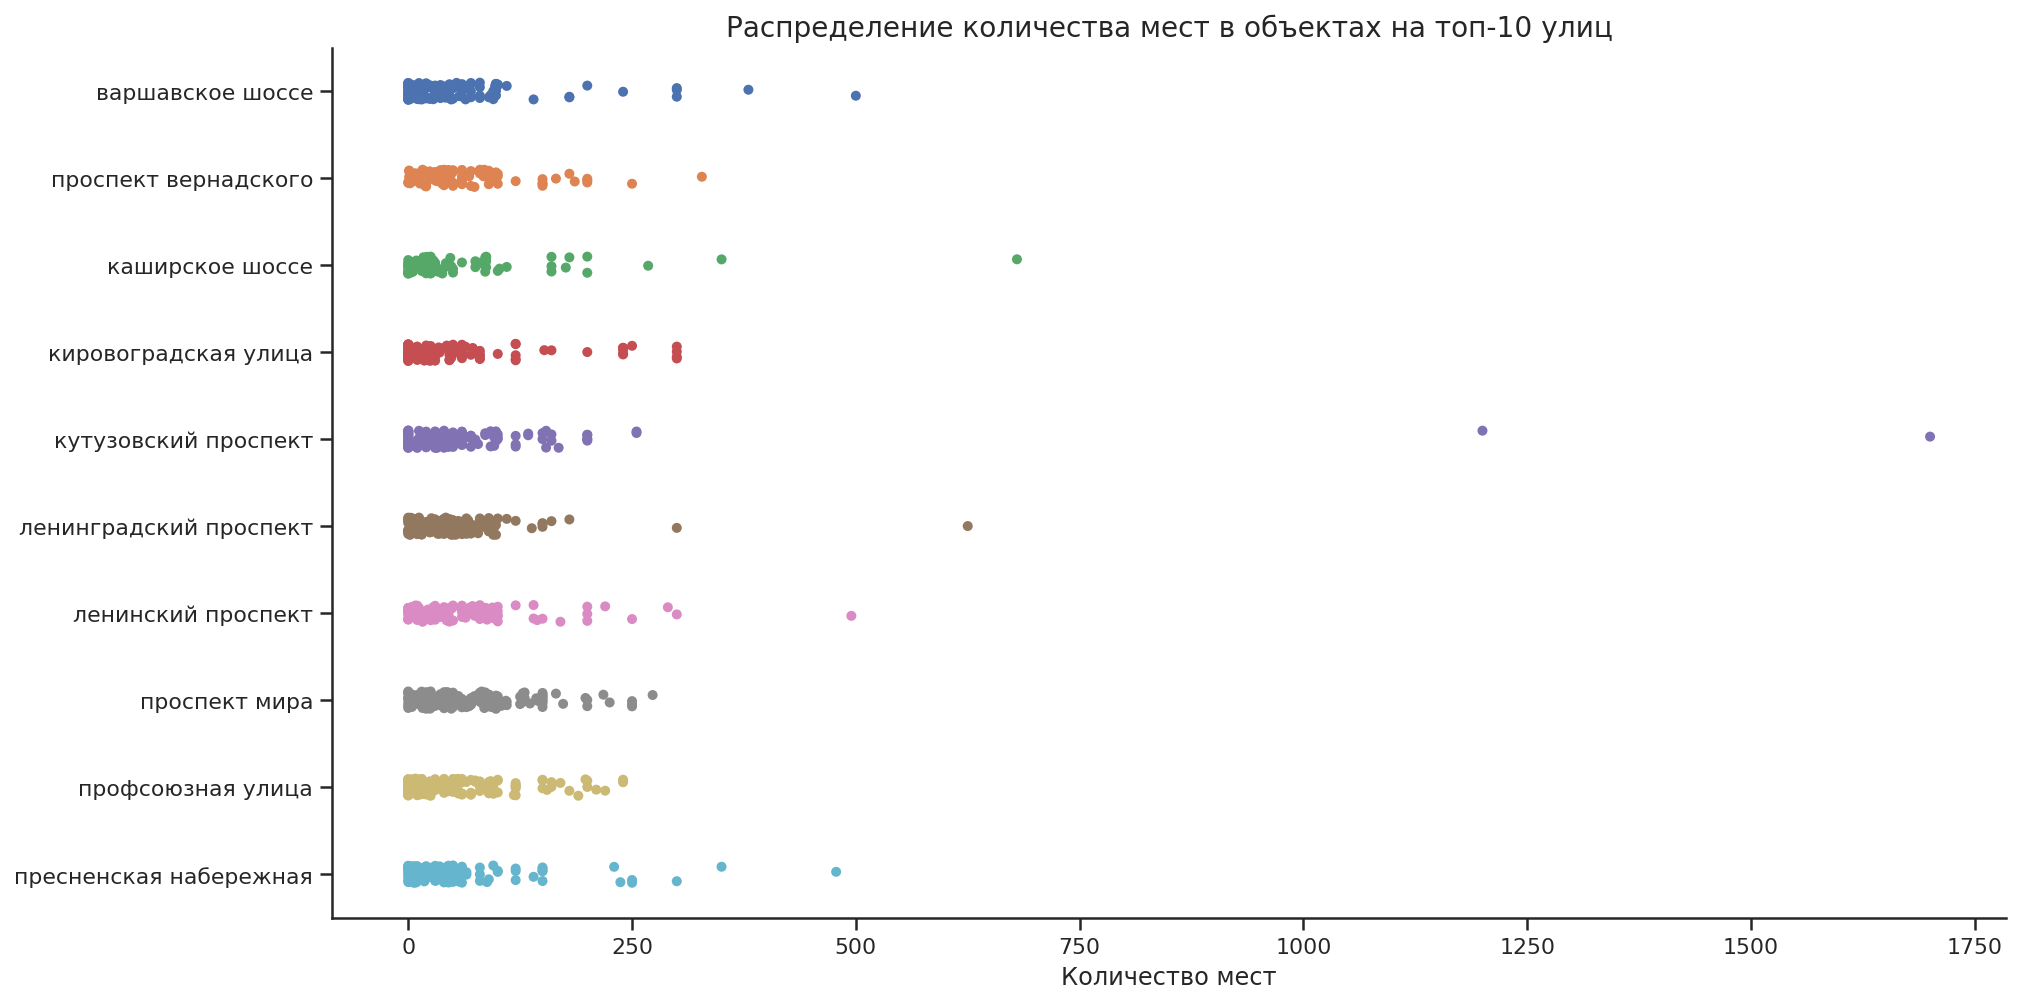

In [42]:
# отфильтруем по топ-10 улиц

df_top10 = df_merged.query('street in @top_list').reset_index()

# построим график

plt.figure(figsize=(15,8))
ax = sns.stripplot(y='street', x='seats', data=df_top10)


ax.set(xlabel='Количество мест', ylabel='')
plt.title('Распределение количества мест в объектах на топ-10 улиц', fontsize=14)
plt.show();


In [43]:
# посмотрим статистики

df_top10['seats'].describe()

count   1341.00
mean      57.11
std       86.47
min        0.00
25%       12.00
50%       36.00
75%       75.00
max     1700.00
Name: seats, dtype: float64

Половина заведений имеют 36 посадочных мест. 

Выбросы мешают оценить реальную картину, поэтому почистим датасет и перестроим график, избавившись от лишних данных – заведениях с количеством мест более верхней границы квартиля Q3.

In [44]:
# отфильтруем заведения с местами меньше 75

df_top10_filtered = df_merged.query('street in @top_list').query('seats <= 75')

# рассмотрим медианные значения посадочных мест у всех улиц

df_top10_filtered_agg = df_top10_filtered \
                        .groupby('street') \
                        .agg({'seats':'median'}) \
                        .sort_values(by='seats', ascending=False)
df_top10_filtered_agg

,seats
street,
кутузовский проспект,30.00
проспект вернадского,30.00
ленинский проспект,28.00
проспект мира,27.50
ленинградский проспект,26.00
каширское шоссе,20.00
кировоградская улица,20.00
пресненская набережная,20.00
варшавское шоссе,15.50


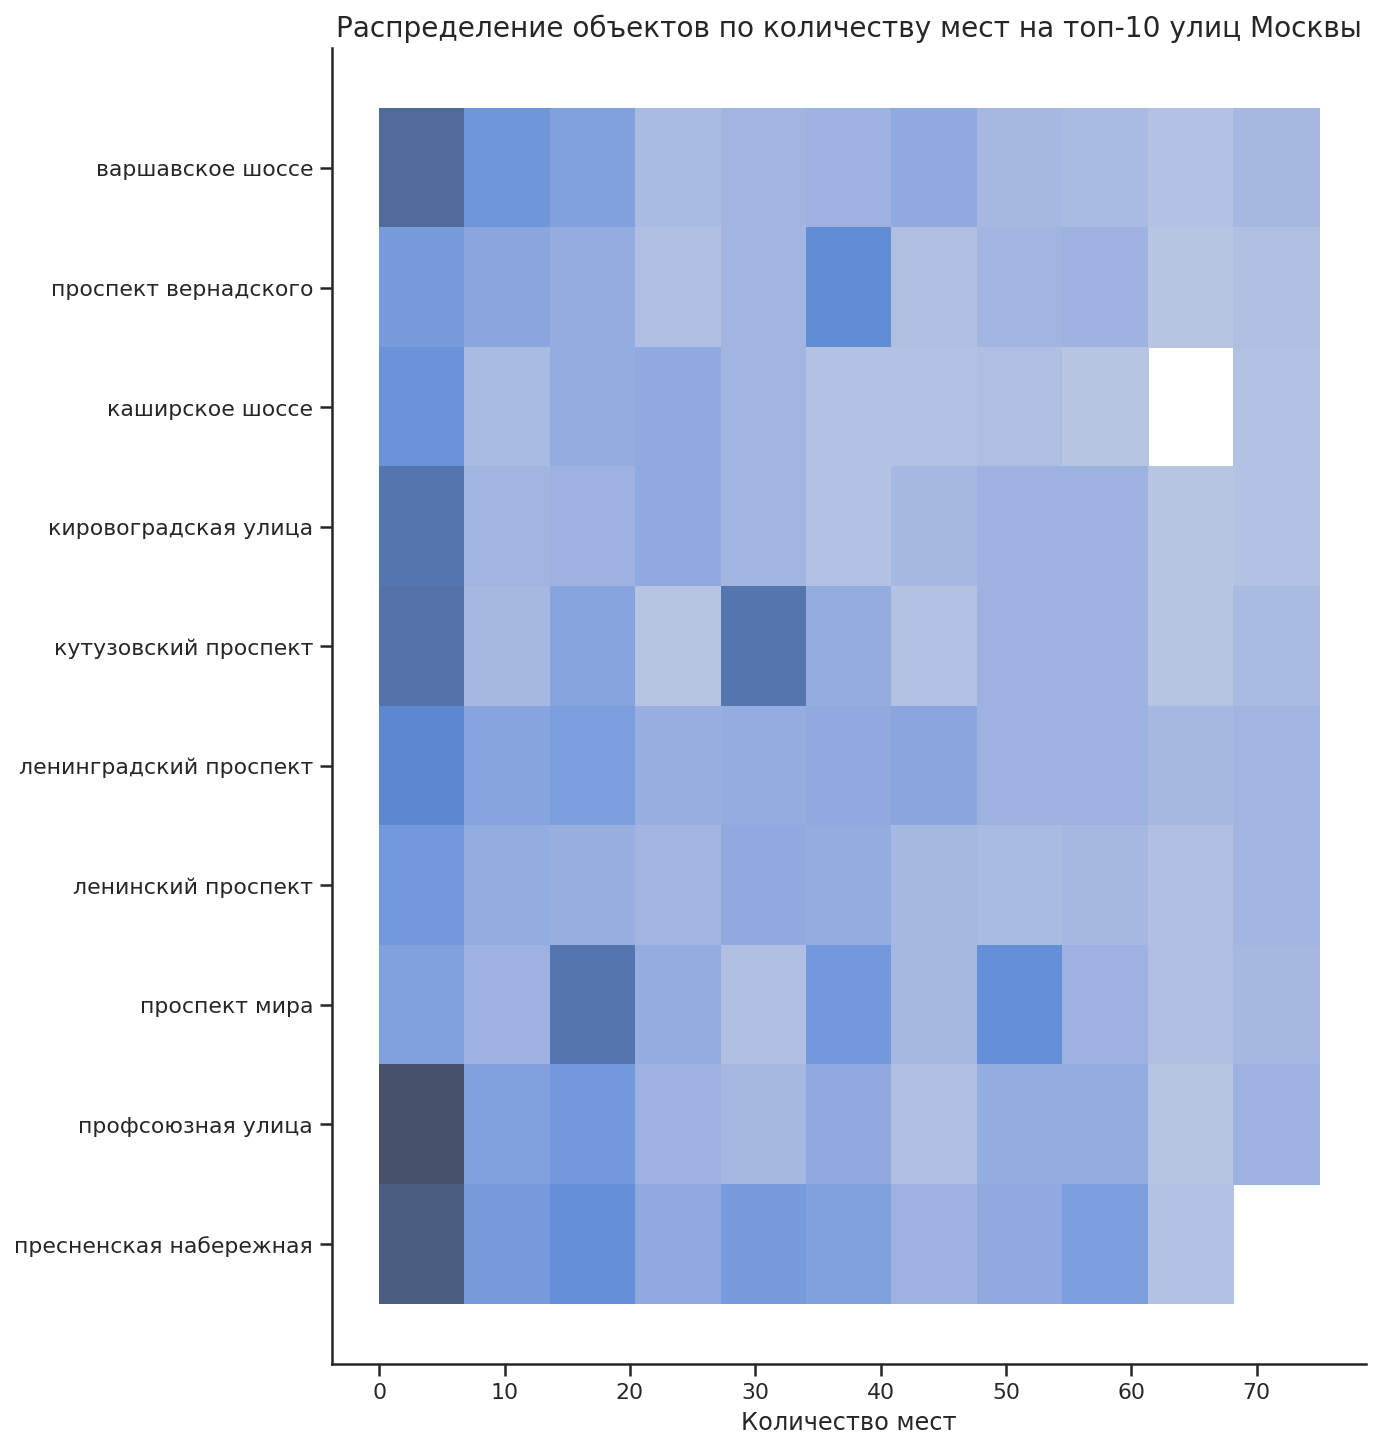

In [45]:
# построим график распределения по улицам

ax = sns.displot(x='seats', y='street', data=df_top10_filtered, height=10)

ax.set(xlabel='Количество мест', ylabel='')
plt.title('Распределение объектов по количеству мест на топ-10 улиц Москвы', \
          fontsize=14)
plt.show();


**Вывод:**


Какие закономерности можно выявить?
- Самые популярные точки в среднем имеют 36 посадочных мест. Скорее всего это связано с высокой ценой аренды в популярных районах.
- Видим скопление небольших заведений (до 10 мест) на Кутузовском проспекте, Кировоградской улице, Профсоюзной улице, Варшавском шоссе, Пресненской набережной.
- Плотность заведений до 10 мест ниже на Проспекте мира, Проспекте Вернандского

### Сделайте общий вывод и дайте рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. 

Прокомментируйте возможность развития сети.


Так как планируется открытие ООП, обслуживаемого роботами – это накладывает некоторые ограничения и сужает выбор типа заведения: рестораны не подойдут, там слишком сложная кухня; столовые – слишком нацелены на офисных работников, что не ассоциируется с вау-маркетингом для роботизированного заведения; бары – расчитаны на публику 21+, что сильно сужает целевую аудиторию, тоже не подойдет.
Из оставшихся популярных типов остаются кафе и фастфуды.




**Вывод**:
- Если руководствоваться распространенностью типов заведений в ТОП-10, то рекомендуется открывать несетевое кафе на 15-30 мест. Но у нас есть вводные, которые корректируют этот вывод
- Локация: для успешного старта рекомендуется открывать заведение в районе, входящем в ТОП-10 популярных мест – конкуренты облюбовали эти районы, а, значит, там большой поток посетителей. Лучше выбирать из тех улиц, на которых небольшое количество заведений, чтобы конкуренция была меньше. В популярном **Пресненском районе** есть 24 улицы, на которых всего 1 заведение. Этот район вполне подходит по всем парамтрам (популярность, трафик, конкуренция)
- Тип заведения: так как стоит вопрос о расширении точек и развитии сети, то интересным вариантом видится сеть **фастфудов или кафе** – в них большой поток посетителей, простая кухня (робот справится со сборкой бургера и смешиванием молочных коктейлей), экономный дизайн помещений. Кроме того, роботы привлекают молодую аудиторию, которая является частым посетителем фастфудов и кафе, активно пользуется соцсетями и поможет быстрее популяризировать новые точки за счет «сарафанного радио»
- Количество посадочных мест: самые популярные точки в среднем имеют **от 15 до 30 посадочных мест**. Скорее всего это связано с высокой ценой аренды в популярных районах. Поэтому ориентироваться стоит именно на такие цифры. В случае выбора фастфуда с моделью «на вынос» или передвижной точки типа «фургончик» – количество мест уменьшается до 5
- Возможность развития сети: фастфуды в наибольшей степени представляют собой легкий выход на **модель распространения по франшизе**, поэтому сетевое распространение – это вполне рабочий вариант развития проекта, в том числе за пределы Москвы
- Конечный выбор зависит от других, не включенных в данный анализ параметров – бюджета на старт проекта, анализа спроса, анализа трафика, анализа стоимости аренды и **других важных составляющих бизнес-планирования**





## Шаг №3. Подготовка презентации


Подготовьте презентацию исследования для инвесторов. Для создания презентации используйте любой удобный инструмент, но отправить презентацию нужно обязательно в формате pdf.

Презентация (1.2Мб, PDF): https://disk.yandex.ru/i/BZE79h6nlvZZ6w
